In [1]:
import time
import ROOT
import numpy as np
import pandas as pd
import root_pandas as rpd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.colors import LogNorm
from root_pandas import read_root
from matplotlib import rc
from numpy import inf

from AtlasCommonUtils import SetAtlasStyle
from ROOT import TLatex



rc('text', usetex=True)

import matplotlib as mpl
rc('font', family='serif')
rc('text', usetex=True)
rc('font', size=22)
rc('xtick', labelsize=15)
rc('ytick', labelsize=15)
rc('legend', fontsize=15)




#
mpl.rcParams.update({'font.size': 19})
#mpl.rcParams.update({'legend.fontsize': 18})
mpl.rcParams.update({'xtick.labelsize': 18}) 
mpl.rcParams.update({'ytick.labelsize': 18}) 
mpl.rcParams.update({'text.usetex' : False})
mpl.rcParams.update({'axes.labelsize': 18}) 
mpl.rcParams.update({'legend.frameon': False}) 

Welcome to JupyROOT 6.22/02


In [2]:
# Define default plot styles
plot_style_0 = {
    'histtype': 'step',
    'color': 'black',
    'linewidth': 2,
    'linestyle': '--',
    'density': True
}

plot_style_1 = {
    'histtype': 'step',
    'color': 'black',
    'linewidth': 2,
    'density': True
}

plot_style_2 = {'alpha': 0.5, 'density': True}

In [3]:
def applyCut(inputDataframe, cut, text=None):
    dataframe = inputDataframe
    nbeforecut = dataframe.shape[0]
    cutDataframe = dataframe.query(cut)
    if text:
        print (text, cutDataframe.shape[0], ' fraction kept: %2.1f'%(100.0*float(cutDataframe.shape[0])/nbeforecut))
    return cutDataframe

In [4]:
def getJetData(inputFiles, isMC=False):
    
    cols = []
    scalar = []
    scalar.append('isBKG')
    scalar.append('polarization')
    scalar.append('x')
    scalar.append('y')
    scalar.append('Q2')
    
    scalar.append('x_e')
    scalar.append('y_e')
    scalar.append('Q2_e')
    
    scalar.append('vertex_z')
    scalar.append('ptratio')
    scalar.append('ptmiss')
    scalar.append('acoplanarity')
    scalar.append('Empz')
    scalar.append('njets')

    scalar.append('e_eta')
    scalar.append('e_theta')
    scalar.append('e_p')
    scalar.append('e_pt')
    scalar.append('e_phi')
    scalar.append('gene_pt')
    
    cols.append('jet_p')
    cols.append('jet_pt')
    cols.append('jet_qt')
    cols.append('jet_dphi')
    cols.append('jet_z')
    cols.append('jet_eta')
    cols.append('jet_phi')
    
    if(isMC):
        scalar.append('Weight')
        scalar.append('WeightGen')
        cols.append('genjet_p')
        cols.append('genjet_pt')
        cols.append('genjet_eta')

        cols.append('genjet_qt')
        cols.append('genjet_dphi')
        cols.append('genjet_z')

    lists = scalar
    dataframes = []
    for inputFilename in inputFiles:
        start = time.time()
        df = read_root(inputFilename, columns=lists+cols,flatten=cols)
        dataframes.append(df)
        end = time.time()
        print ('\n', 'Processed', inputFilename, 'in',  '%2.1f'%(end-start), 'seconds')
    return pd.concat([x for x in dataframes])

In [5]:
def getData(inputFiles, isMC=False):
    
    cols = []
    scalar = []  
    scalar.append('isBKG')
    scalar.append('polarization')

    scalar.append('x')
    scalar.append('y')
    scalar.append('Q2')
    
        
    scalar.append('x_e')
    scalar.append('y_e')
    scalar.append('Q2_e')

    scalar.append('e_eta')
    scalar.append('e_theta')
    scalar.append('e_p')
    scalar.append('e_pt')
    scalar.append('e_phi')
    scalar.append('gene_pt')

    scalar.append('vertex_z')
    scalar.append('ptratio')
    scalar.append('ptmiss')
    scalar.append('acoplanarity')
    scalar.append('Empz')
    scalar.append('njets')
    
    if(isMC):
        scalar.append('Weight')
        scalar.append('WeightGen')
    
    lists = scalar
    dataframes = []
    for inputFilename in inputFiles:
        start = time.time()
        df = read_root(inputFilename, columns=lists+cols,flatten=cols)
        dataframes.append(df)
        end = time.time()
        print ('\n', 'Processed', inputFilename, 'in',  '%2.1f'%(end-start), 'seconds')
    return pd.concat([x for x in dataframes])

In [6]:
def applyCuts(df):
    temp = df
    temp = applyCut(temp, 'abs(vertex_z)<25 and vertex_z!=0','abs(vertex_z)<25 and and vertex_z!=0')
    temp = applyCut(temp, '0.2 < y < 0.7', '0.2 < y < 0.7')
    temp = applyCut(temp, 'Q2>150', 'Q2>150')
    temp = applyCut(temp, 'e_pt>15', 'e_pt >15')
    temp = applyCut(temp, 'isBKG<1.0', 'isBKG')

    #temp = applyCut(temp, 'x > 0.05', 'x>0.05')
    temp.eval('logQ2= log(Q2)/2.3025850', inplace=True)
    temp.eval('logx= log(x)/2.3025850', inplace=True)
    return temp

In [7]:
def applyCutsJets(df,isMC=False):
    temp = df
    temp = applyCut(temp, 'abs(vertex_z)<25 and vertex_z!=0','abs(vertex_z)<25 and and vertex_z!=0')
    temp = applyCut(temp, '0.2 < y < 0.7', '0.2 < y < 0.7')
    temp = applyCut(temp, 'Q2>150', 'Q2>150')
    temp = applyCut(temp, 'e_pt>15', 'e_pt >15')
    temp = applyCut(temp, 'jet_pt>10', 'jet_pt>10')
    temp = applyCut(temp, 'isBKG<1.0', 'isBKG')

    #temp = applyCut(temp, 'jet_qt<5', 'jet_qt<5')

    #temp = applyCut(temp, 'dphi_e_jet > 2.74', 'dphi_e_jet>3.14159-0.4')
    #temp = applyCut(temp, 'Q2>100.0', ' Q2>100.0')
    
    #temp.eval('dphi = 3.14159-jet_dphi', inplace=True)
    temp.eval('jet_qtnormjetpt= jet_qt/jet_pt', inplace=True)
    temp.eval('jet_qtnormept= jet_qt/e_pt', inplace=True)
    if(isMC):
        temp.eval('genjet_qtnormept= genjet_qt/e_pt', inplace=True)
        temp.eval('genjet_qtnormjetpt= genjet_qt/genjet_pt', inplace=True)


    #df = applyCut(df, 'n_total>1', ' n>1')
    return temp

## Get dataframes

In [8]:
df_jet      = applyCutsJets(getJetData(['data_echeme.root']))
mc_jet = applyCutsJets(getJetData(['rapgap.root'],isMC=True),isMC=True)
altmc_jet = applyCutsJets(getJetData(['djangoh.root'],isMC=True),isMC=True)


 Processed data_echeme.root in 3.2 seconds
abs(vertex_z)<25 and and vertex_z!=0 111629  fraction kept: 90.0
0.2 < y < 0.7 66449  fraction kept: 59.5
Q2>150 66449  fraction kept: 100.0
e_pt >15 24440  fraction kept: 36.8
jet_pt>10 22125  fraction kept: 90.5
isBKG 19278  fraction kept: 87.1

 Processed rapgap.root in 38.3 seconds
abs(vertex_z)<25 and and vertex_z!=0 958520  fraction kept: 96.7
0.2 < y < 0.7 677816  fraction kept: 70.7
Q2>150 677816  fraction kept: 100.0
e_pt >15 294734  fraction kept: 43.5
jet_pt>10 263459  fraction kept: 89.4
isBKG 235608  fraction kept: 89.4

 Processed djangoh.root in 34.9 seconds
abs(vertex_z)<25 and and vertex_z!=0 920853  fraction kept: 96.6
0.2 < y < 0.7 650115  fraction kept: 70.6
Q2>150 650115  fraction kept: 100.0
e_pt >15 271425  fraction kept: 41.8
jet_pt>10 239917  fraction kept: 88.4
isBKG 214401  fraction kept: 89.4


In [10]:
eptmin = 20
eptmax = 25

variable    = 'jet_dphi' 
genvariable = 'genjet_dphi'
namevariable = r'$\Delta\phi$'
minval = 2.5
maxval = np.pi
bins = np.linspace(2.5, np.pi, 20)


#variable    = 'jet_pt' 
#genvariable = 'genjet_pt'
#namevariable = r'$p_{T}$'
#minval = 5
#maxval = 30



data_cut = df_jet#.query('e_pt > %2.2f and e_pt<%2.2f '%(eptmin,eptmax))
mc_cut = mc_jet#.query('e_pt > %2.2f and e_pt<%2.2f '%(eptmin,eptmax))
altmc_cut = altmc_jet#.query('e_pt > %2.2f and e_pt<%2.2f'%(eptmin,eptmax))

<function matplotlib.pyplot.hist>

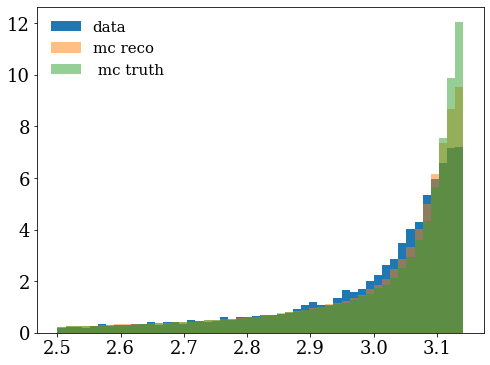

In [16]:
fig = plt.figure(figsize=(8,6))

plt.hist(data_cut[variable],range=(minval,maxval),bins=50, density=True,label='data')
plt.hist(mc_cut[variable],range=(minval,maxval),bins=50,density=True,alpha=0.5,label='mc reco')
plt.hist(mc_cut[genvariable],range=(minval,maxval),bins=50, density=True,alpha=0.5,label =' mc truth')
plt.legend(loc='best', frameon=False)
plt.hist

### Define UniFold Algorithm


In [15]:
from __future__ import absolute_import, division, print_function

import numpy as np
from matplotlib import pyplot as plt
from matplotlib.patches import Patch

from sklearn.model_selection import train_test_split

import tensorflow as tf
import keras
import keras.backend as K
from keras.layers import Dense, Input
from keras.models import Model
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping

2020-11-14 13:45:50.897863: W tensorflow/stream_executor/platform/default/dso_loader.cc:59] Could not load dynamic library 'libcudart.so.10.1'; dlerror: libcudart.so.10.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/miguel/anaconda3/envs/my_root_env/lib:
2020-11-14 13:45:50.897881: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


## Unifold

In [17]:
"""    Arguments:
                            
        iterations: number of iterations (integer)
        
        theta0_G: nominal generation-level observable as Numpy array
                    
        theta0_G: nominal simulation-level observable as Numpy array
                    
        theta_unknown_S: "natural" (unknown) simulation-level observable 
                            to be unfolded as Numpy arrays
        
        Returns:
        - A Numpy array of weights to reweight distributions in 
        theta0_G to the unfolded distribution of theta_unknown_S
        
        - The model used to calculate those weights
"""


def unifold(iterations, theta0_G, theta0_S, theta_unknown_S):
    labels0 = np.zeros(len(theta0_G))
    labels_unknown = np.ones(len(theta_unknown_S))

    xvals_1 = np.concatenate((theta0_S, theta_unknown_S))
    yvals_1 = np.concatenate((labels0, labels_unknown))

    xvals_2 = np.concatenate((theta0_G, theta0_G))
    yvals_2 = np.concatenate((labels0, labels_unknown))

    weights = np.empty(shape=(iterations, 2, len(theta0_G)))
    # shape = (iteration, step, event)

    weights_pull = np.ones(len(theta0_S))
    weights_push = np.ones(len(theta0_G))

    inputs = Input((1, ))
    hidden_layer_1 = Dense(50, activation='relu')(inputs)
    hidden_layer_2 = Dense(50, activation='relu')(hidden_layer_1)
    hidden_layer_3 = Dense(50, activation='relu')(hidden_layer_2)
    outputs = Dense(1, activation='sigmoid')(hidden_layer_3)

    model = Model(inputs=inputs, outputs=outputs)

    earlystopping = EarlyStopping(patience=10,
                                  verbose=1,
                                  restore_best_weights=True)

    # from NN (DCTR)
    def reweight(events):
        f = model.predict(events, batch_size=10000)
        weights = f / (1. - f)
        return np.squeeze(weights)

    for i in range(iterations):
        print("\nITERATION: {}\n".format(i + 1))

        # STEP 1: classify Sim. (which is reweighted by weights_push) to Data
        # weights reweighted Sim. --> Data
        print("STEP 1\n")

        weights_1 = np.concatenate(
            (weights_push, np.ones(len(theta_unknown_S))))
        # actual weights for Sim., ones for Data

        X_train_1, X_test_1, Y_train_1, Y_test_1, w_train_1, w_test_1 = train_test_split(
            xvals_1, yvals_1, weights_1)

        model.compile(loss='binary_crossentropy',
                      optimizer='Adam',
                      metrics=['accuracy'])
        model.fit(X_train_1,
                  Y_train_1,
                  sample_weight=w_train_1,
                  epochs=200,
                  batch_size=10000,
                  validation_data=(X_test_1, Y_test_1, w_test_1),
                  callbacks=[earlystopping],
                  verbose=1)

        weights_pull = weights_push * reweight(theta0_S)
        weights[i, :1, :] = weights_pull

        # STEP 2: classify Gen. to reweighted Gen. (which is reweighted by weights_pull)
        # weights Gen. --> reweighted Gen.
        print("\nSTEP 2\n")

        weights_2 = np.concatenate((np.ones(len(theta0_G)), weights_pull))
        # ones for Gen., actual weights for (reweighted) Gen.

        X_train_2, X_test_2, Y_train_2, Y_test_2, w_train_2, w_test_2 = train_test_split(
            xvals_2, yvals_2, weights_2)

        model.compile(loss='binary_crossentropy',
                      optimizer='Adam',
                      metrics=['accuracy'])
        model.fit(X_train_2,
                  Y_train_2,
                  sample_weight=w_train_2,
                  epochs=200,
                  batch_size=10000,
                  validation_data=(X_test_2, Y_test_2, w_test_2),
                  callbacks=[earlystopping],
                  verbose=1)

        weights_push = reweight(theta0_G)
        weights[i, 1:2, :] = weights_pull

    return weights, model

## Define features (input for the unfolding)

In [ ]:
#m_ll_0_G, m_ll_unknown_G, m_ll_0_S, m_ll_unknown_S = train_test_split(
#    Events.events['truth_m_ll'][mypass],
#    Events.events['m_ll'][mypass],
#    test_size=0.5)
dphi_0_G = mc_cut[genvariable][:200000]
dphi_0_S =mc_cut[variable][:200000]
dphi_unknown_G = altmc_cut[genvariable][:200000]
dphi_unknown_S = altmc_cut[variable][:200000]

ept_0_G = mc_cut['gene_pt'][:200000]
ept_0_S =mc_cut['e_pt'][:200000]
ept_unknown_G = altmc_cut['gene_pt'][:200000]
ept_unknown_S = altmc_cut['e_pt'][:200000]

jetpt_0_G = mc_cut['genjet_pt'][:200000]
jetpt_0_S =mc_cut['jet_pt'][:200000]
jetpt_unknown_G = altmc_cut['genjet_pt'][:200000]
jetpt_unknown_S = altmc_cut['jet_pt'][:200000]

In [ ]:
ept_0_G = mc_cut['gene_pt'][:200000]
ept_0_S =mc_cut['e_pt'][:200000]
ept_unknown_G = altmc_cut['gene_pt'][:200000]
ept_unknown_S = altmc_cut['e_pt'][:200000]

In [ ]:
jetpt_0_G = mc_cut['genjet_pt'][:200000]
jetpt_0_S =mc_cut['jet_pt'][:200000]
jetpt_unknown_G = altmc_cut['genjet_pt'][:200000]
jetpt_unknown_S = altmc_cut['jet_pt'][:200000]

In [ ]:
# standardize the inputs
X_det = (X_det - np.mean(X_det, axis=0))/np.std(X_det, axis=0)
X_gen = (X_gen - np.mean(X_gen, axis=0))/np.std(X_gen, axis=0)

In [ ]:
bins = np.linspace(0.0, np.pi, 40)

fig, ax = plt.subplots(1,
                       2,
                       figsize=(12, 5),
                       constrained_layout=True,
                       sharey=True)
ax[0].set_xlabel(namevariable)
ax[0].set_ylabel('Events per bin')
hG0, _, _ = ax[0].hist(dphi_0_G, bins=bins, alpha=0.5, label='Generation')
hS0, _, _ = ax[0].hist(dphi_0_S, bins=bins, alpha=0.5, label='Simulation')
legend = ax[0].legend(title='Synthetic', loc='best', frameon=False)
plt.setp(legend.get_title(), multialignment='center')

ax[1].set_xlabel(namevariable)
hG1, _, _ = ax[1].hist(dphi_unknown_G, bins=bins, alpha=0.5, label='Truth')
hS1, _, _ = ax[1].hist(dphi_unknown_S, bins=bins, alpha=0.5, label='Detector')
legend = ax[1].legend(title='"Natural"', loc='best', frameon=False)
plt.setp(legend.get_title(), multialignment='center')

# plt.ylim([0,1.5*np.max(np.concatenate((hG0, hG1, hS0, hS1)))])

fig.show()

In [ ]:
bins = np.linspace(5, 55, 30)
fig, ax = plt.subplots(1,
                       2,
                       figsize=(12, 5),
                       constrained_layout=True,
                       sharey=True)
ax[0].set_xlabel('Electron pT [GeV]')
ax[0].set_ylabel('Events per bin')
hG0, _, _ = ax[0].hist(ept_0_G, bins=bins, alpha=0.5, label='Generation')
hS0, _, _ = ax[0].hist(ept_0_S, bins=bins, alpha=0.5, label='Simulation')
legend = ax[0].legend(title='Synthetic', loc='best', frameon=False)
plt.setp(legend.get_title(), multialignment='center')

ax[1].set_xlabel('Electron pT [GeV]')
hG1, _, _ = ax[1].hist(ept_unknown_G, bins=bins, alpha=0.5, label='Truth')
hS1, _, _ = ax[1].hist(ept_unknown_S, bins=bins, alpha=0.5, label='Detector')
legend = ax[1].legend(title='"Natural"', loc='best', frameon=False)
plt.setp(legend.get_title(), multialignment='center')

# plt.ylim([0,1.5*np.max(np.concatenate((hG0, hG1, hS0, hS1)))])

fig.show()

In [ ]:

weights, _ = unifold(iterations=2,
                     theta0_G=dphi_0_G / 100.,
                     theta0_S=dphi_0_S / 100.,
                     theta_unknown_S=dphi_unknown_S / 100.)

In [ ]:
bins = np.linspace(2.5, np.pi, 40)

for i in range(len(weights)):
    print("ITERATION {}:".format(i + 1))
    plt.figure(figsize=(6, 5))
    hist0 = plt.hist(dphi_0_G, bins=bins, label=r'Gen.', **plot_style_2)

    hist1 = plt.hist(dphi_0_G,
                     bins=bins,
                     label='Gen. DCTR wgt.',
                     weights=weights[i, 1, :],
                     **plot_style_1)
    hist2 = plt.hist(dphi_unknown_G,
                     bins=bins,
                     label=r'Target (Truth)',
                     **plot_style_2)
    plt.legend(frameon=False)
    plt.xlabel(namevariable)
    plt.ylabel("Events per bin (normalized)")
    plt.show()

In [ ]:

weights, _ = unifold(iterations=2,
                     theta0_G=ept_0_G / 100.,
                     theta0_S=ept_0_S / 100.,
                     theta_unknown_S=ept_unknown_S / 100.)

In [ ]:
bins = np.linspace(5, 55, 30)

for i in range(len(weights)):
    print("ITERATION {}:".format(i + 1))
    plt.figure(figsize=(6, 5))
    hist0 = plt.hist(ept_0_G, bins=bins, label=r'Gen.', **plot_style_2)

    hist1 = plt.hist(ept_0_G,
                     bins=bins,
                     label='Gen. DCTR wgt.',
                     weights=weights[i, 1, :],
                     **plot_style_1)
    hist2 = plt.hist(ept_unknown_G,
                     bins=bins,
                     label=r'Target (Truth)',
                     **plot_style_2)
    plt.legend(frameon=False)
    plt.xlabel('Electron pT [GeV]')
    plt.ylabel("Events per bin (normalized)")
    plt.show()

## Multifold

In [ ]:
K.clear_session()

/home/miguel/anaconda3/envs/my_root_env/lib/python3.7/site-packages/ipykernel_launcher.py:63: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


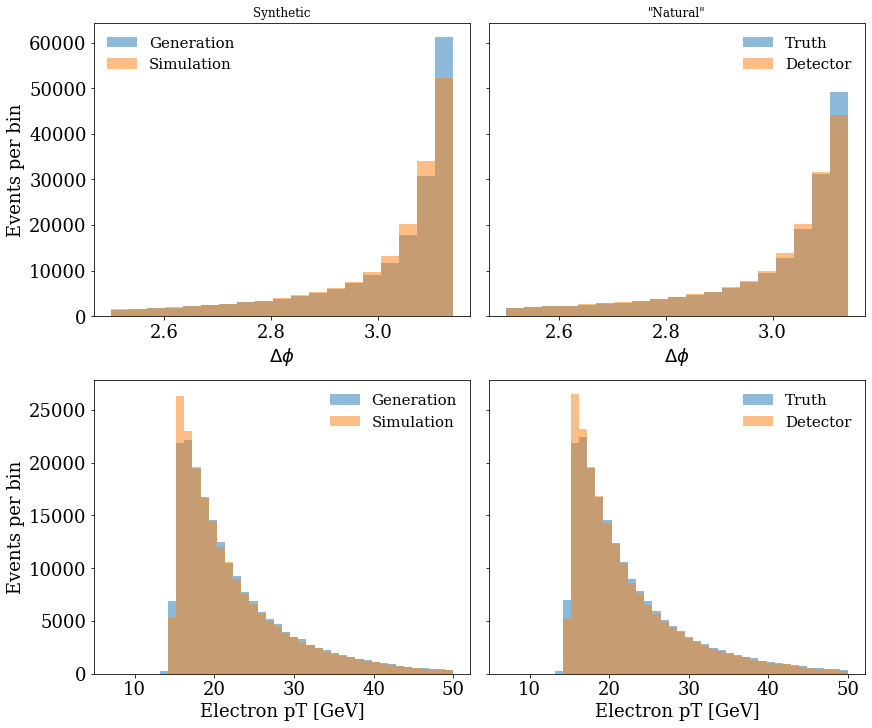

In [18]:
fig, ax = plt.subplots(2,
                       2,
                       figsize=(12, 10),
                       constrained_layout=True,
                       sharey='row')

bins = np.linspace(2.5, np.pi, 20)
## Define Multifold 
#bins = np.linspace(5, 50, 45)

ax[0, 0].set_title('Synthetic')
ax[0, 0].set_xlabel(namevariable)
ax[0, 0].set_ylabel('Events per bin')
hG0, _, _ = ax[0, 0].hist(dphi_0_G, bins=bins, alpha=0.5, label='Generation')
hS0, _, _ = ax[0, 0].hist(dphi_0_S, bins=bins, alpha=0.5, label='Simulation')
legend = ax[0, 0].legend(loc='best', frameon=False)
plt.setp(legend.get_title(), multialignment='center')

ax[0, 1].set_title('"Natural"')
ax[0, 1].set_xlabel(namevariable)
hG1, _, _ = ax[0, 1].hist(dphi_unknown_G, bins=bins, alpha=0.5, label='Truth')
hS1, _, _ = ax[0, 1].hist(dphi_unknown_S,
                          bins=bins,
                          alpha=0.5,
                          label='Detector')
legend = ax[0, 1].legend(loc='best', frameon=False)
plt.setp(legend.get_title(), multialignment='center')






bins = np.linspace(7, 50, 43)

ax[1, 0].set_xlabel('Electron pT [GeV]')
ax[1, 0].set_ylabel('Events per bin')
hG0, _, _ = ax[1, 0].hist(ept_0_G,
                          bins=bins,
                          alpha=0.5,
                          label='Generation')
hS0, _, _ = ax[1, 0].hist(ept_0_S,
                          bins=bins,
                          alpha=0.5,
                          label='Simulation')
legend = ax[1, 0].legend(loc='best', frameon=False)
plt.setp(legend.get_title(), multialignment='center')

ax[1, 1].set_xlabel('Electron pT [GeV]')
hG1, _, _ = ax[1, 1].hist(ept_unknown_G,
                          bins=bins,
                          alpha=0.5,
                          label='Truth')
hS1, _, _ = ax[1, 1].hist(ept_unknown_S,
                          bins=bins,
                          alpha=0.5,
                          label='Detector')
legend = ax[1, 1].legend(loc='best', frameon=False)
plt.setp(legend.get_title(), multialignment='center')

# plt.ylim([0,1.5*np.max(np.concatenate((hG0, hG1, hS0, hS1)))])

fig.show()

## Define Multifold 

In [13]:
# Input multiple observables as tuple or list (i.e. theta0_G = (obs_1, obs_2, ...))
"""    Arguments:
        num_observables: number of observables to 
                            simultaneously unfold (integer)
                            
        iterations: number of iterations (integer)
        
        theta0_G: tuple or list of nominal 
                    generation-level observables as Numpy arrays
                    
        theta0_S: tuple or list of nominal 
                    simulation-level observables as Numpy arrays
                    
        theta_unknown_S: tuple or list of "natural" 
                            (unknown) simulation-level observables 
                            to be unfolded as Numpy arrays
        
        Returns:
        - A Numpy array of weights to reweight distributions in 
        theta0_G to the unfolded distribution of theta_unknown_S
        
        - The model used to calculate those weights
"""


def multifold(num_observables, iterations, theta0_G, theta0_S,
              theta_unknown_S):

    theta0_G = np.stack(theta0_G, axis=1)
    theta0_S = np.stack(theta0_S, axis=1)
    theta_unknown_S = np.stack(theta_unknown_S, axis=1)

    labels0 = np.zeros(len(theta0_G))
    labels_unknown = np.ones(len(theta_unknown_S))

    xvals_1 = np.concatenate((theta0_S, theta_unknown_S))
    yvals_1 = np.concatenate((labels0, labels_unknown))

    xvals_2 = np.concatenate((theta0_G, theta0_G))
    yvals_2 = np.concatenate((labels0, labels_unknown))

    weights = np.empty(shape=(iterations, 2, len(theta0_G)))
    # shape = (iteration, step, event)

    weights_pull = np.ones(len(theta0_S))
    weights_push = np.ones(len(theta0_G))

    inputs = Input((num_observables, ))
    hidden_layer_1 = Dense(50, activation='relu')(inputs)
    hidden_layer_2 = Dense(50, activation='relu')(hidden_layer_1)
    hidden_layer_3 = Dense(50, activation='relu')(hidden_layer_2)
    outputs = Dense(1, activation='sigmoid')(hidden_layer_3)

    model = Model(inputs=inputs, outputs=outputs)

    earlystopping = EarlyStopping(patience=10,
                                  verbose=1,
                                  restore_best_weights=True)

    # from NN (DCTR)
    def reweight(events):
        f = model.predict(events, batch_size=10000)
        weights = f / (1. - f)
        return np.squeeze(weights)

    for i in range(iterations):
        print("\nITERATION: {}\n".format(i + 1))

        # STEP 1: classify Sim. (which is reweighted by weights_push) to Data
        # weights reweighted Sim. --> Data
        print("STEP 1\n")

        weights_1 = np.concatenate(
            (weights_push, np.ones(len(theta_unknown_S))))
        # actual weights for Sim., ones for Data

        X_train_1, X_test_1, Y_train_1, Y_test_1, w_train_1, w_test_1 = train_test_split(
            xvals_1, yvals_1, weights_1)

        model.compile(loss='binary_crossentropy',
                      optimizer='Adam',
                      metrics=['accuracy'])
        model.fit(X_train_1,
                  Y_train_1,
                  sample_weight=w_train_1,
                  epochs=200,
                  batch_size=10000,
                  validation_data=(X_test_1, Y_test_1, w_test_1),
                  callbacks=[earlystopping],
                  verbose=1)

        weights_pull = weights_push * reweight(theta0_S)
        weights[i, :1, :] = weights_pull

        # STEP 2: classify Gen. to reweighted Gen. (which is reweighted by weights_pull)
        # weights Gen. --> reweighted Gen.
        print("\nSTEP 2\n")

        weights_2 = np.concatenate((np.ones(len(theta0_G)), weights_pull))
        # ones for Gen., actual weights for (reweighted) Gen.

        X_train_2, X_test_2, Y_train_2, Y_test_2, w_train_2, w_test_2 = train_test_split(
            xvals_2, yvals_2, weights_2)

        model.compile(loss='binary_crossentropy',
                      optimizer='Adam',
                      metrics=['accuracy'])
        model.fit(X_train_2,
                  Y_train_2,
                  sample_weight=w_train_2,
                  epochs=200,
                  batch_size=10000,
                  validation_data=(X_test_2, Y_test_2, w_test_2),
                  callbacks=[earlystopping],
                  verbose=1)

        weights_push = reweight(theta0_G)
        weights[i, 1:2, :] = weights_pull

    return weights, model

## Unfold two variables simultaneously

In [ ]:
num_observables = 2

# simple / 100. standardization s.t. data is of order ~1

weights, _ = multifold(num_observables=num_observables,
                       iterations=2,
                       theta0_G=(dphi_0_G / 100., ept_0_G / 100.),
                       theta0_S=(dphi_0_S / 100., ept_0_S / 100.),
                       theta_unknown_S=(dphi_unknown_S / 100.,
                                        ept_unknown_S / 100.))

In [ ]:
for i in range(len(weights)):

    print("ITERATION: {}".format(i + 1))
    bins = np.linspace(2.5, np.pi, 20)
    #bins = np.linspace(5, 50, 45)

    fig, ax = plt.subplots(1,
                           num_observables,
                           figsize=(12, 6),
                           constrained_layout=True)
    ax[0].set_xlabel(namevariable)
    ax[0].set_ylabel('Events per bin (Normalized)')
    ax[0].hist(dphi_0_G, bins=bins, label=r'Gen.', **plot_style_2)
    ax[0].hist(dphi_0_G,
               bins=bins,
               weights=weights[i, 1, :],
               label=r'Gen. DCTR wgt.',
               **plot_style_1)

    ax[0].hist(dphi_unknown_G,
               bins=bins,
               label=r'Target (Truth)',
               **plot_style_2)
    ax[0].legend(frameon=False)

    bins = np.linspace(7, 50, 43)

    ax[1].set_xlabel('Electron pT [GeV]')
    ax[1].set_ylabel('Events per bin (Normalized)')
    ax[1].hist(ept_0_G, bins=bins, label=r'Gen.', **plot_style_2)
    ax[1].hist(ept_0_G,
               bins=bins,
               weights=weights[i, 1, :],
               label=r'Gen. DCTR wgt.',
               **plot_style_1)
    ax[1].hist(ept_unknown_G,
               bins=bins,
               label=r'Target (Truth)',
               **plot_style_2)
    ax[1].legend(frameon=False)

    fig.show()
    plt.show()

## 3D unfolding

In [ ]:
def standarize(X):
    #X = (X - np.mean(X, axis=0))/np.std(X, axis=0)
    
    return X

In [ ]:
dphi_0_G = standarize(dphi_0_G)
dphi_0_S = standarize(dphi_0_S)
dphi_unknown_S = standarize(dphi_unknown_S)
dphi_unknown_G = standarize(dphi_unknown_G)


ept_0_G = standarize(ept_0_G)
ept_0_S = standarize(ept_0_S)
ept_unknown_S = standarize(ept_unknown_S)
ept_unknown_G = standarize(ept_unknown_G)

jetpt_0_G = standarize(jetpt_0_G)
jetpt_0_S = standarize(jetpt_0_S)
jetpt_unknown_S = standarize(jetpt_unknown_S)
jetpt_unknown_G = standarize(jetpt_unknown_G)



In [11]:
dphi_0_G = mc_cut[genvariable][:200000]
dphi_0_S =mc_cut[variable][:200000]
dphi_unknown_G = altmc_cut[genvariable][:200000]
dphi_unknown_S = altmc_cut[variable][:200000]

ept_0_G = mc_cut['gene_pt'][:200000]
ept_0_S =mc_cut['e_pt'][:200000]
ept_unknown_G = altmc_cut['gene_pt'][:200000]
ept_unknown_S = altmc_cut['e_pt'][:200000]

jetpt_0_G = mc_cut['genjet_pt'][:200000]
jetpt_0_S =mc_cut['jet_pt'][:200000]
jetpt_unknown_G = altmc_cut['genjet_pt'][:200000]
jetpt_unknown_S = altmc_cut['jet_pt'][:200000]

jeteta_0_G = mc_cut['genjet_eta'][:200000]
jeteta_0_S =mc_cut['jet_eta'][:200000]
jeteta_unknown_G = altmc_cut['genjet_eta'][:200000]
jeteta_unknown_S = altmc_cut['jet_eta'][:200000]



In [19]:
num_observables = 4

# simple / 100. standardization s.t. data is of order ~1

weights, _ = multifold(num_observables=num_observables,
                       iterations=2,
                       theta0_G=(dphi_0_G, ept_0_G/10.0, jetpt_0_G/10.0,jeteta_0_G),
                       theta0_S=(dphi_0_S, ept_0_S/10.0, jetpt_0_S/10.0,jeteta_0_S),
                       theta_unknown_S=(dphi_unknown_S,
                                        ept_unknown_S/10.0,
                                        jetpt_unknown_S/10.0,
                                        jeteta_unknown_S))


ITERATION: 1

STEP 1

Epoch 1/200
30/30 [==============================] - 9s 287ms/step - loss: 0.6960 - accuracy: 0.5101 - val_loss: 0.6922 - val_accuracy: 0.5201
Epoch 2/200
30/30 [==============================] - 0s 6ms/step - loss: 0.6917 - accuracy: 0.5222 - val_loss: 0.6916 - val_accuracy: 0.5212
Epoch 3/200
30/30 [==============================] - 0s 6ms/step - loss: 0.6914 - accuracy: 0.5249 - val_loss: 0.6914 - val_accuracy: 0.5227
Epoch 4/200
30/30 [==============================] - 0s 6ms/step - loss: 0.6912 - accuracy: 0.5258 - val_loss: 0.6913 - val_accuracy: 0.5252
Epoch 5/200
30/30 [==============================] - 0s 6ms/step - loss: 0.6910 - accuracy: 0.5269 - val_loss: 0.6913 - val_accuracy: 0.5252
Epoch 6/200
30/30 [==============================] - 0s 6ms/step - loss: 0.6910 - accuracy: 0.5271 - val_loss: 0.6911 - val_accuracy: 0.5260
Epoch 7/200
30/30 [==============================] - 0s 6ms/step - loss: 0.6908 - accuracy: 0.5272 - val_loss: 0.6909 - val_accur

30/30 [==============================] - 0s 6ms/step - loss: 0.6907 - accuracy: 0.4997 - val_loss: 0.6909 - val_accuracy: 0.4988
Epoch 7/200
30/30 [==============================] - 0s 6ms/step - loss: 0.6906 - accuracy: 0.5003 - val_loss: 0.6909 - val_accuracy: 0.4991
Epoch 8/200
30/30 [==============================] - 0s 6ms/step - loss: 0.6907 - accuracy: 0.4997 - val_loss: 0.6909 - val_accuracy: 0.4988
Epoch 9/200
30/30 [==============================] - 0s 6ms/step - loss: 0.6906 - accuracy: 0.5001 - val_loss: 0.6910 - val_accuracy: 0.4979
Epoch 10/200
30/30 [==============================] - 0s 5ms/step - loss: 0.6906 - accuracy: 0.5003 - val_loss: 0.6909 - val_accuracy: 0.4985
Epoch 11/200
30/30 [==============================] - 0s 5ms/step - loss: 0.6907 - accuracy: 0.5008 - val_loss: 0.6911 - val_accuracy: 0.4982
Epoch 12/200
30/30 [==============================] - 0s 6ms/step - loss: 0.6906 - accuracy: 0.4994 - val_loss: 0.6911 - val_accuracy: 0.4996
Epoch 13/200
30/30 [==

2020-11-14 13:46:14.492836: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2020-11-14 13:46:14.523851: E tensorflow/stream_executor/cuda/cuda_driver.cc:314] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2020-11-14 13:46:14.523912: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: miguel-Precision-7750
2020-11-14 13:46:14.523928: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: miguel-Precision-7750
2020-11-14 13:46:14.524128: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 450.66.0
2020-11-14 13:46:14.524183: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 450.66.0
2020-11-14 13:46:14.524197: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:310] kernel version seems to match DSO: 450.66.0
2020-11-14 13:46:14.525537: I tensorflow/core/platform/cpu_feat

ITERATION: 1


/home/miguel/anaconda3/envs/my_root_env/lib/python3.7/site-packages/ipykernel_launcher.py:78: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


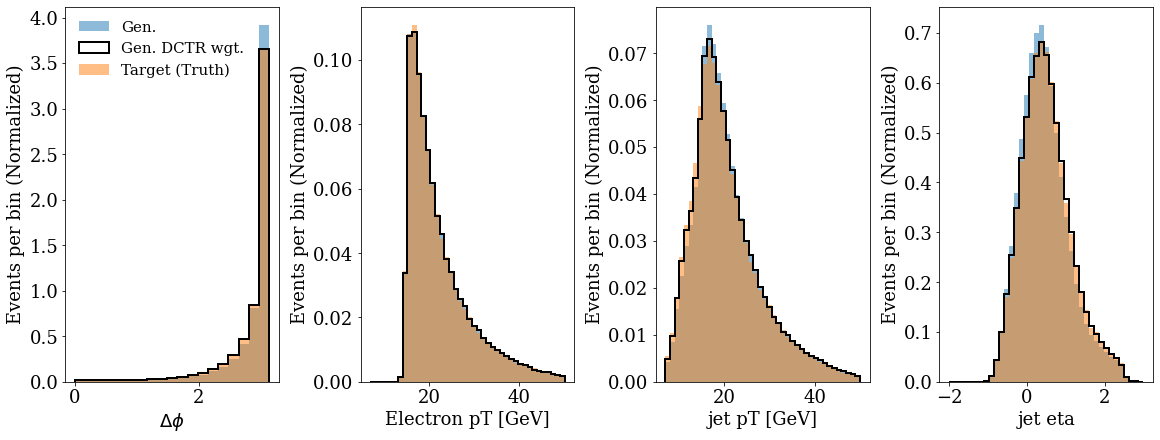

ITERATION: 2


/home/miguel/anaconda3/envs/my_root_env/lib/python3.7/site-packages/ipykernel_launcher.py:78: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


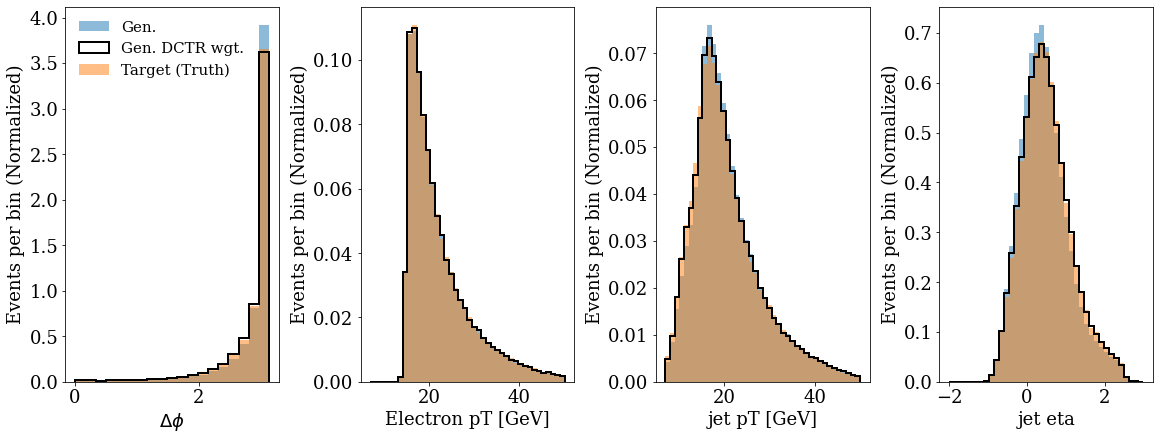

In [27]:
for i in range(len(weights)):

    print("ITERATION: {}".format(i + 1))
    bins = np.linspace(0.0, np.pi, 20)
    #bins = np.linspace(5, 50, 45)

    fig, ax = plt.subplots(1,
                           num_observables,
                           figsize=(16, 6),
                           constrained_layout=True)
    ax[0].set_xlabel(namevariable)
    ax[0].set_ylabel('Events per bin (Normalized)')
    ax[0].hist(dphi_0_G, bins=bins, label=r'Gen.', **plot_style_2)
    ax[0].hist(dphi_0_G,
               bins=bins,
               weights=weights[i, 1, :],
               label=r'Gen. DCTR wgt.',
               **plot_style_1)

    ax[0].hist(dphi_unknown_G,
               bins=bins,
               label=r'Target (Truth)',
               **plot_style_2)
    ax[0].legend(frameon=False)

    bins = np.linspace(7, 50, 43)
    #bins = np.linspace(0, 2.0, 40)

    ax[1].set_xlabel('Electron pT [GeV]')
    ax[1].set_ylabel('Events per bin (Normalized)')
    ax[1].hist(ept_0_G, bins=bins, label=r'Gen.', **plot_style_2)
    ax[1].hist(ept_0_G,
               bins=bins,
               weights=weights[i, 1, :],
               label=r'Gen. DCTR wgt.',
               **plot_style_1)
    ax[1].hist(ept_unknown_G,
               bins=bins,
               label=r'Target (Truth)',
               **plot_style_2)
    #ax[1].legend(frameon=False)

    
    
    bins = np.linspace(7, 50, 43)
   # bins = np.linspace(0, 2.0, 40)

    ax[2].set_xlabel('jet pT [GeV]')
    ax[2].set_ylabel('Events per bin (Normalized)')
    ax[2].hist(jetpt_0_G, bins=bins, label=r'Gen.', **plot_style_2)
    ax[2].hist(jetpt_0_G,
               bins=bins,
               weights=weights[i, 1, :],
               label=r'Gen. DCTR wgt.',
               **plot_style_1)
    ax[2].hist(jetpt_unknown_G,
               bins=bins,
               label=r'Target (Truth)',
               **plot_style_2)
    #ax[2].legend(frameon=False)
    
    bins = np.linspace(-2.0, 3.0, 40)

    
    ax[3].set_xlabel('jet eta')
    ax[3].set_ylabel('Events per bin (Normalized)')
    ax[3].hist(jeteta_0_G, bins=bins, label=r'Gen.', **plot_style_2)
    ax[3].hist(jeteta_0_G,
               bins=bins,
               weights=weights[i, 1, :],
               label=r'Gen. DCTR wgt.',
               **plot_style_1)
    ax[3].hist(jeteta_unknown_G,
               bins=bins,
               label=r'Target (Truth)',
               **plot_style_2)
    
    fig.show()
    plt.show()

In [23]:
weights.shape

(2, 2, 200000)

In [ ]:
##apply in data


In [30]:
len(data_cut)

19278

In [28]:
dphi_0_G = mc_cut[genvariable][:200000]
dphi_0_S =mc_cut[variable][:200000]
#dphi_unknown_G = altmc_cut[genvariable][:200000]
dphi_unknown_S = data_cut[variable][:200000]

ept_0_G = mc_cut['gene_pt'][:200000]
ept_0_S =mc_cut['e_pt'][:200000]
#ept_unknown_G = altmc_cut['gene_pt'][:200000]
ept_unknown_S = data_cut['e_pt'][:200000]

jetpt_0_G = mc_cut['genjet_pt'][:200000]
jetpt_0_S =mc_cut['jet_pt'][:200000]
#jetpt_unknown_G = altmc_cut['genjet_pt'][:200000]
jetpt_unknown_S = data_cut['jet_pt'][:200000]

jeteta_0_G = mc_cut['genjet_eta'][:200000]
jeteta_0_S =mc_cut['jet_eta'][:200000]
#jeteta_unknown_G = altmc_cut['genjet_eta'][:200000]
jeteta_unknown_S = data_cut['jet_eta'][:200000]


In [29]:
num_observables = 4

# simple / 100. standardization s.t. data is of order ~1

weights, _ = multifold(num_observables=num_observables,
                       iterations=2,
                       theta0_G=(dphi_0_G, ept_0_G/10.0, jetpt_0_G/10.0,jeteta_0_G),
                       theta0_S=(dphi_0_S, ept_0_S/10.0, jetpt_0_S/10.0,jeteta_0_S),
                       theta_unknown_S=(dphi_unknown_S,
                                        ept_unknown_S/10.0,
                                        jetpt_unknown_S/10.0,
                                        jeteta_unknown_S))


ITERATION: 1

STEP 1

Epoch 1/200
17/17 [==============================] - 5s 297ms/step - loss: 0.3334 - accuracy: 0.9120 - val_loss: 0.3138 - val_accuracy: 0.9124
Epoch 2/200
17/17 [==============================] - 0s 7ms/step - loss: 0.3080 - accuracy: 0.9120 - val_loss: 0.3055 - val_accuracy: 0.9124
Epoch 3/200
17/17 [==============================] - 0s 6ms/step - loss: 0.3038 - accuracy: 0.9120 - val_loss: 0.3026 - val_accuracy: 0.9124
Epoch 4/200
17/17 [==============================] - 0s 6ms/step - loss: 0.3021 - accuracy: 0.9120 - val_loss: 0.3009 - val_accuracy: 0.9124
Epoch 5/200
17/17 [==============================] - 0s 7ms/step - loss: 0.3010 - accuracy: 0.9120 - val_loss: 0.2997 - val_accuracy: 0.9124
Epoch 6/200
17/17 [==============================] - 0s 7ms/step - loss: 0.2998 - accuracy: 0.9120 - val_loss: 0.2986 - val_accuracy: 0.9124
Epoch 7/200
17/17 [==============================] - 0s 7ms/step - loss: 0.2988 - accuracy: 0.9120 - val_loss: 0.2977 - val_accur

17/17 [==============================] - 0s 7ms/step - loss: 0.2912 - accuracy: 0.9137 - val_loss: 0.2910 - val_accuracy: 0.9142
Epoch 59/200
17/17 [==============================] - 0s 6ms/step - loss: 0.2912 - accuracy: 0.9137 - val_loss: 0.2910 - val_accuracy: 0.9142
Epoch 60/200
17/17 [==============================] - 0s 6ms/step - loss: 0.2914 - accuracy: 0.9137 - val_loss: 0.2909 - val_accuracy: 0.9142
Epoch 61/200
17/17 [==============================] - 0s 6ms/step - loss: 0.2911 - accuracy: 0.9137 - val_loss: 0.2909 - val_accuracy: 0.9142
Epoch 62/200
17/17 [==============================] - 0s 7ms/step - loss: 0.2910 - accuracy: 0.9137 - val_loss: 0.2909 - val_accuracy: 0.9142
Epoch 63/200
17/17 [==============================] - 0s 7ms/step - loss: 0.2910 - accuracy: 0.9137 - val_loss: 0.2911 - val_accuracy: 0.9143
Epoch 64/200
17/17 [==============================] - 0s 6ms/step - loss: 0.2912 - accuracy: 0.9137 - val_loss: 0.2909 - val_accuracy: 0.9142
Epoch 65/200
17/17 

ValueError: Found input variables with inconsistent numbers of samples: [400000, 219278, 400000]